In [30]:
seznam2=[];
for G in graphs.nauty_geng('2 -c'):
    seznam2.append(G)


In [31]:
seznam3=[];
for G in graphs.nauty_geng('3 -c'):
    seznam3.append(G)


In [13]:
seznam4=[];
for G in graphs.nauty_geng('4 -c'):
    seznam4.append(G)


In [14]:
seznam5=[];
for G in graphs.nauty_geng('5 -c'):
    seznam5.append(G)
    

In [15]:
seznam6=[];
for G in graphs.nauty_geng('6 -c'):
    seznam6.append(G)


In [24]:
seznam7=[];
for G in graphs.nauty_geng('7 -c'):
    seznam7.append(G)

In [25]:
seznam8=[];
for G in graphs.nauty_geng('8 -c'):
    seznam8.append(G)


In [11]:
def dominacijsko(G):
    t = G.dominating_set(value_only= True)
    return t

In [10]:
def nepadajoc_seznam(G):
    D = G.degree_sequence()
    D.reverse()
    return D


In [9]:
def stevilo_povezav(G):
    stevilo = G.edges()
    return len(stevilo)

In [8]:
def anihilacijsko_stevilo(G):
    D = nepadajoc_seznam(G)
    m = stevilo_povezav(G)
    a = 0
    v = 0
    i = 0
    while v <= m:
        if v + D[i] <= m:
            a = a + 1
            v = v + D[i]
            i = i + 1
        else:
            v = v + D[i]
    return a

In [7]:
def neenakost(G):
    gama = dominacijsko(G)
    a = anihilacijsko_stevilo(G)
    return a + 1 - gama >= 0

In [6]:
def preveri_male_grafe(seznam_grafov):
    for i in seznam_grafov:
        if neenakost(i) == False:
            return False
    return True


In [5]:
from sage.graphs.connectivity import is_connected
def spremeni_graf(G):
    H = Graph(G)
    if random() < 0.50:
        i = 0
        while True:
            H.delete_edge(H.random_edge())
            if is_connected(H):
                H
                break
            else:
                H = Graph(G)
                i = i + 1
                True
            if i > 15: #Št. poskusov odstranitve
                H.add_edge(H.complement().random_edge()) #Grafu H doda random povezavo, ki je še ni v grafu (izbira povezave iz komplementa grafa H)
                break
    else: 
        if H.complement().size() == 0: #Če je število povezav v komplementu == 0
            H.delete_edge(H.random_edge()) # Grafu H zbriše random povezavo
        else:
            H.add_edge(H.complement().random_edge()) # Graf H doda povezavo, ki je še ni v grafu (izbira med povezavami v komplementu)
    return H


In [4]:
def razlika(G):
    gama = dominacijsko(G)
    a = anihilacijsko_stevilo(G)
    return a + 1 - gama 

In [28]:
def najmanjse_razlike(G):
    stevilo_korakov = 2000
    trenutna_razlika = min_razlike = razlika(G)
    seznam_grafov_min = [G]
    for p in range(0, stevilo_korakov):
        T = stevilo_korakov / (p+1)
        nov_graf = spremeni_graf(G)
        nova_razlika = razlika(nov_graf)
        if nova_razlika < min_razlike:
            min_razlike = nova_razlika
            seznam_grafov_min = []
            seznam_grafov_min.append(nov_graf)
        elif nova_razlika == min_razlike:
            if all(not H.is_isomorphic(nov_graf) for H in seznam_grafov_min): # Grafi naj se ne ponavljajo v seznamu
                seznam_grafov_min.append(nov_graf)
        if nova_razlika < trenutna_razlika or exp(-1 * (nova_razlika - trenutna_razlika) / T) >= random():
            G = nov_graf
            trenutna_razlika = nova_razlika

    return (min_razlike, seznam_grafov_min)

In [29]:
def najvecje_razlike(G):
    stevilo_korakov = 1000
    trenutna_razlika = max_razlike = razlika(G)
    seznam_grafov_max = [G]
    for p in range(0, stevilo_korakov):
        T = stevilo_korakov / ( p + 1 )
        nov_graf = spremeni_graf(G)
        nova_razlika = razlika(nov_graf)
        if nova_razlika > max_razlike:
            max_razlike = nova_razlika
            seznam_grafov_max = []
            seznam_grafov_max.append(nov_graf)
        elif nova_razlika == max_razlike:
             if all(not H.is_isomorphic(nov_graf) for H in seznam_grafov_max):
                seznam_grafov_max.append(nov_graf)
        if nova_razlika > trenutna_razlika or exp(-1 * (trenutna_razlika - nova_razlika) / T) >= random():
            G = nov_graf
            trenutna_razlika = nova_razlika
        G = nov_graf

    return (max_razlike, seznam_grafov_max)

In [30]:
def nakljucni_graf(st_vozlisc, st_povezav):
    graf = graphs.RandomGNM(st_vozlisc, st_povezav)
    while graf.is_connected() == False:
        graf = graphs.RandomGNM(st_vozlisc, st_povezav)
    nakljucni = graf
    nakljucni.show()
    return nakljucni

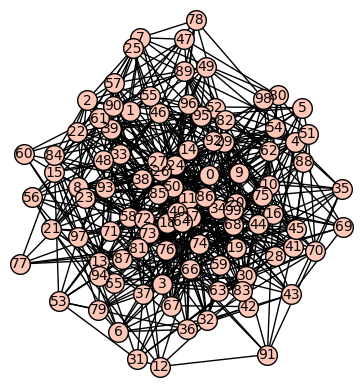

KeyboardInterrupt: 

In [32]:
raz, L = najvecje_razlike(nakljucni_graf(100,600))
print(raz)
#for G in L:
    #G.show()

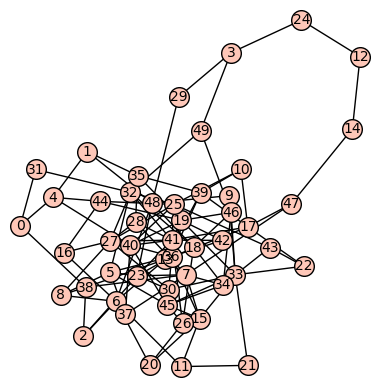

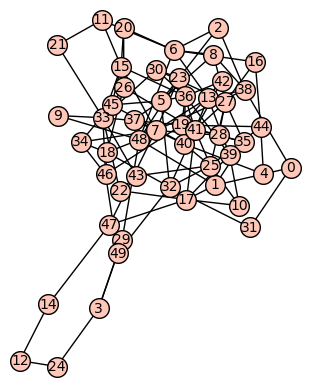

In [14]:
for G in L:
    G.show()

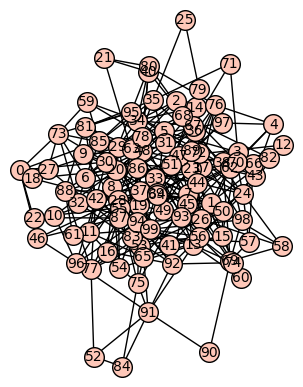

In [53]:
L[14].show()

In [13]:
min([G.size() for G in L])

605

In [14]:
max([G.size() for G in L])

648

In [22]:
[G.size() for G in L]

[126, 127, 128, 127, 128, 129]

In [15]:
len(L)

176

In [15]:
def ravninski():
    true = 0
    false = 0
    for el in [G.is_planar() for G in L]:
        if el == True:
            true = true + 1
        else:
            false = false + 1
    return (true, false)

In [16]:
def drevo():
    true = 0
    false = 0
    for el in [G.is_tree() for G in L]:
        if el == True:
            true = true + 1
        else:
            false = false + 1
    return (true, false)

In [17]:
def kaktus():
    true = 0
    false = 0
    for el in [G.is_cactus() for G in L]:
        if el == True:
            true = true + 1
        else:
            false = false + 1
    return (true, false)

In [23]:
ravninski()

(0, 2)

In [24]:
drevo()

(0, 2)

In [25]:
kaktus()

(0, 2)

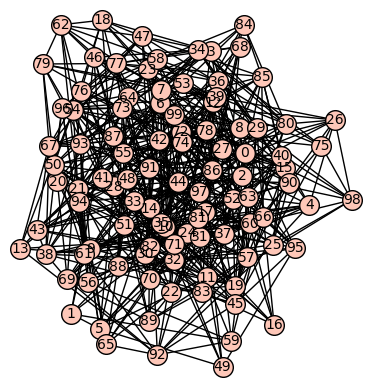

In [12]:
i = 0
while i <= 10:
    i = i + 1
    raz, L = najvecje_razlike(nakljucni_graf(100,600))
    if raz > 52:
        print(raz)
        break


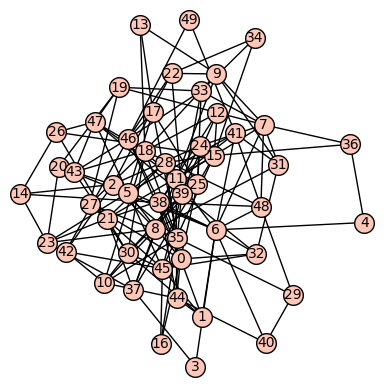

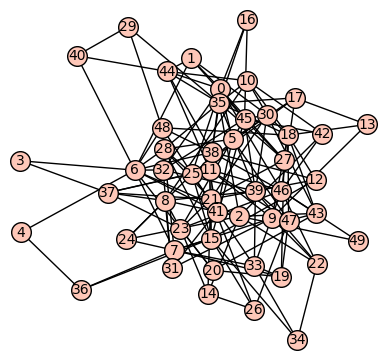

In [44]:
for G in L:
    G.show()

In [27]:
for G in L:
    print razlika(G)

26
26


26
26
26


26
26
26
26
26
26
26
26


26
26
26
26
26
26


26
26
26


26


26
26
26


26
26
26
26
26
26


26
